In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import sklearn.datasets
import sklearn.linear_model

## 2.4 การจำแนกหลายประเภท

จากปัญหาการจำแนกทวิภาค เราสามารถขยายไปยังโมเดล DNN สำหรับการจำแนกหลายประเภท 
โครงสร้างของโมเดลไม่มีความแตกต่างจากเดิม 
ยกเว้นในชั้นสุดท้ายที่เอาต์พุตจะต้องมีจำนวนเท่ากับประเภทของข้อมูลที่ต้องการจำแนก 

### 2.4.1 ฟังก์ชันกระตุ้นแบบซอฟต์แมกซ์

สังเกตว่าฟังก์ชันซิกมอยด์จะสามารถใช้จำแนกประเภทข้อมูลออกเป็น 2 กลุ่มตามค่าของความน่าจะเป็น 
หากต้องการจำแนกประเภทมากกว่า 2 กลุ่มจะใช้ฟังก์ชัน ซอฟต์แมกซ์ (softmax) 
ซึ่งเป็นการขยายฟังก์ชันลอจิสติกไปยังหลายมิติ นิยามมาตรฐานของฟังก์ชันซอฟต์แมกซ์ 
$\sigma : \mathbf{R}^K \rightarrow [0,1]^K$ เป็นดังนี้
$$
\sigma (Z)_i = \frac{e^{z_i}}{\sum_{j=1}^Ke^{z_j}}, \;i=1,\ldots,K, \; Z = (z_1,\ldots,z_K) \in \mathbf{R}^K \tag{2.49}
$$

อธิบายเป็นคำพูดได้ว่าเป็นการใช้ฟังก์ชันเลขชี้กำลังกับแต่ละสมาชิก $z_i$  ของเวกเตอร์ $Z$ 
และปรับค่าให้เป็นบรรทัดฐานโดยหารด้วยผลรวมของเลขชี้กำลังทั้งหมด 
ซึ่งมีผลทำให้ผลรวมของสมาชิกทั้งหมดในเวกเตอร์เอาต์พุตเท่ากับ 1 
ดังนั้นจึงเหมาะสมกับการจำแนกหลายกลุ่มโดยความน่าจะเป็นของเอาต์พุต

การสร้างโมเดลสำหรับปัญหาการจำแนกหลายประเภทโดยใช้ไลบรารี TF จะมีลักษณะเช่นเดียวกับตัวอย่าง 2.5 
สิ่งที่แตกต่างคือชั้นสุดท้ายจะมีเซลล์เอาต์พุตเท่ากับจำนวนของประเภททั้งหมดที่ต้องการจำแนก และใช้ฟังก์ชันกระตุ้นแบบซอฟต์แมกซ์

**ตัวอย่าง 2.6** 

ในไลบรารี TF มีข้อมูลสนับสนุนการศึกษาด้านการเรียนรู้เชิงลึกอยู่หลายชุดที่สามารถโหลดมาใช้งานได้ทันที ตัวอย่างหนึ่งคือการจำแนกเครื่องแต่งกาย 
10 ประเภท โดยชุดข้อมูลมีชื่อเรียกว่า fashion_mnist (https://github.com/zalandoresearch/fashion-mnist) 
จะใช้ข้อมูลนี้เพื่อสาธิตการสร้างโมเดล DNN สำหรับจำแนกเครื่องแต่งกาย 

นำเข้าไลบรารีทั้งหมดที่ใช้ในตัวอย่างนี้

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image

โหลดข้อมูล fashion_mnist จากไลบรารี ครั้งแรกจะใช้เวลาโหลดข้อมูลจากอินเทอร์เน็ตมาติดตั้งในเครื่องของเรา 
ในการรันเซลล์ครั้งต่อไปจะใช้ข้อมูลที่เก็บไว้ในเครื่อง

In [4]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

ตรวจสอบรูปของข้อมูลการฝึกจะเห็นว่าเป็นภาพที่มีความกว้างและยาก 28 พิกเซลจำนวน 60000 ภาพ ส่วนข้อมูลสำหรับทดสอบมีจำนวน 10000 ภาพ

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

นิยามเวกเตอร์ของเลเบลที่สอดคล้องกับข้อมูล

In [7]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

ปรับมาตราส่วนของภาพเพื่อให้แต่ละพิกเซลมีค่าระหว่าง 0 - 1 

In [8]:
train_images = train_images/255.
test_images = test_images/255.

เราสามารถดูภาพที่ใช้ในการฝึกได้โดยโค้ดดังนี้ (เปลี่ยนค่าตัวชี้ i ตามต้องการ)

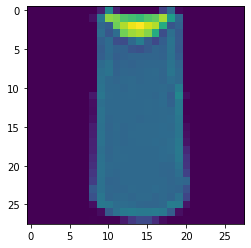

label: T-shirt/top


In [9]:
i = 2 # change to observe another image
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

สร้างโมเดล DNN 3 ชั้นแฝงที่มีจำนวนเซลล์ 16, 16, 10 มีรูปของอินพุตเท่ากับขนาดความกว้างและยาวของภาพ และฟังก์ชันกระตุ้นที่เอาต์พุตแบบซอฟต์แมกซ์

In [10]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


สำหรับคำสั่งคอมไพล์ จุดที่แตกต่างคือฟังก์ชันสูญเสียเลือกเป็นแบบ 'sparse_categorical_crossentropy' 

In [12]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ทดลองฝึกโมเดลเป็นจำนวน 10 รอบโดยเก็บข้อมูลการฝึกในดิกชันนารี history

In [13]:
history=model.fit(train_images[...,np.newaxis], train_labels, epochs=10, batch_size=256, verbose=2)

Epoch 1/10
235/235 - 1s - loss: 1.9278 - accuracy: 0.3280 - 787ms/epoch - 3ms/step
Epoch 2/10
235/235 - 0s - loss: 1.1528 - accuracy: 0.6269 - 306ms/epoch - 1ms/step
Epoch 3/10
235/235 - 0s - loss: 0.8838 - accuracy: 0.6619 - 301ms/epoch - 1ms/step
Epoch 4/10
235/235 - 0s - loss: 0.7913 - accuracy: 0.6962 - 305ms/epoch - 1ms/step
Epoch 5/10
235/235 - 0s - loss: 0.7340 - accuracy: 0.7237 - 304ms/epoch - 1ms/step
Epoch 6/10
235/235 - 0s - loss: 0.6920 - accuracy: 0.7441 - 414ms/epoch - 2ms/step
Epoch 7/10
235/235 - 0s - loss: 0.6591 - accuracy: 0.7613 - 401ms/epoch - 2ms/step
Epoch 8/10
235/235 - 0s - loss: 0.6325 - accuracy: 0.7734 - 452ms/epoch - 2ms/step
Epoch 9/10
235/235 - 0s - loss: 0.6093 - accuracy: 0.7855 - 459ms/epoch - 2ms/step
Epoch 10/10
235/235 - 0s - loss: 0.5892 - accuracy: 0.7943 - 372ms/epoch - 2ms/step


การพล็อตข้อมูลการฝึกในตัวอย่างนี้จะใช้ไลบรารี pandas โดยแปลงตัวแปร history เป็นเฟรมข้อมูล

In [14]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,1.927842,0.328033
1,1.152767,0.626933
2,0.883824,0.661950
3,0.791277,0.696183
4,0.734011,0.723717


พล็อตความแม่นยำและค่าสูญเสียเทียบกับรอบการฝึกได้ดังในรูปที่ 2.25 และ 2.26 ตามลำดับ

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

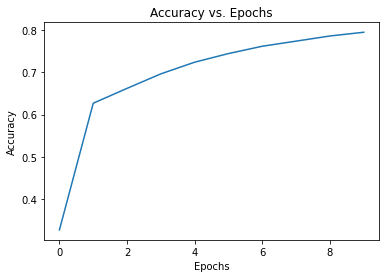

In [15]:
acc_plot = df.plot(y="accuracy",title="Accuracy vs. Epochs", legend=False)
acc_plot.set(xlabel="Epochs",ylabel="Accuracy")

รูปที่ 2.25 ค่าความแม่นยำเทียบกับจำนวนรอบ

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

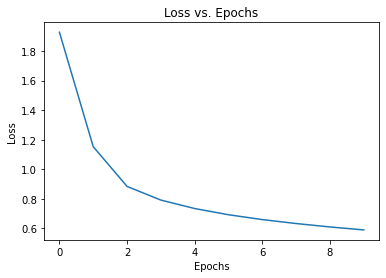

In [16]:
loss_plot = df.plot(y="loss",title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs",ylabel="Loss")

รูปที่ 2.26 ค่าฟังก์ชันสูญเสียเทียบกับจำนวนรอบ

ประเมินความแม่นยำและค่าการสูญเสียโดยใช้ภาพสำหรับทดสอบ พบว่าค่าความแม่นยำน้อยกว่าที่ได้จากข้อมูลการฝึกเล็กน้อย

In [17]:
model.evaluate(test_images[..., np.newaxis],test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.6064 - accuracy: 0.7901


[0.6064181923866272, 0.7900999784469604]

ตรวจสอบว่าโมเดลสามารถพยากรณ์ได้ถูกต้องหรือไม่จากภาพที่สุ่มจากข้อมูลชุดทดสอบ

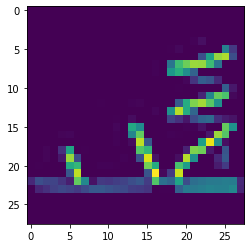

Label : Sandal


In [18]:
random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label : {labels[test_labels[random_inx]]}")

In [19]:
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction : {labels[np.argmax(pred)]}")

1/1 [==============================] - 0s 219ms/step
Model prediction : Sandal


ทดลองรันสองเซลล์ด้านบนนี้หลายครั้งเพื่อเปลี่ยนภาพทดสอบ พิจารณาให้เหตุผลภาพที่โมเดลพยากรณ์ไม่ถูกต้อง

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja 2022</div>